## Численное решение интегральных уравнений Фредгольма 2-го рода

Реализуем метод квадратур для решения интегральных уравнений Фредгольма 2-го рода

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def fredholm_method(K, f, a, b, h, iterations=1000, tol=1e-6):

    # Разделяем область интегрировани [a, b] на h частей
    x = np.arange(a, b + h, h)

    # Определяем количество отрезков
    n = len(x)
    
    # Создаем матрицу размера n x n, состоящую из 0
    A = np.zeros((n, n))
    for i in range(n):
        A[i, 0] = -h * 0.5 * K(x[i], x[0])
        for j in range(1, n-1):
            A[i, j] = -h * K(x[i], x[j])
        A[i, n-1] = -h * 0.5 * K(x[i], x[n-1])
        A[i, i] += 1
    
    B = np.array([f(xi) for xi in x]).reshape(-1, 1)
    
    # Начальное приближение
    x_0 = np.zeros_like(B)

    # Метод простых итераций
    x_new = x_0.copy()
    for k in range(iterations):
        for i in range(n):
            # Вычисляем новое значение для x_i
            x_new[i] = (B[i] - np.dot(A[i], x_0) + A[i, i] * x_0[i]) / A[i, i]
        
        # Проверяем условие сходимости
        if np.linalg.norm(x_new - x_0) < tol:
            return x_new
        
        # Обновляем предыдущее приближение
        x_0 = x_new.copy()

    return x_new

Пример

In [108]:
%%timeit

# Параметры
h = np.pi / 10
a = -np.pi
b = np.pi
_lambda = 3 / (10 * np.pi)

# Ядро уравнения
def K(x1, s):
    return 1 / (0.64 * (np.cos((x1 + s) / 2)) ** 2 - 1) * _lambda

# Правая часть уравнения
def f(x1):
    return 25 - 16 * (np.sin(x1)) ** 2

# Точное решение
def y_exact(x1):
    return 17 / 2 + 128 / 17 * np.cos(2 * x1)

x_values = np.arange(a, b + h, h)

# Решение уравнения
y_approx = fredholm_method(K, f, a, b, h)
exact = y_exact(x_values)

df = pd.DataFrame({'x': np.arange(a, b + h, h),
                   'y_exact': y_exact(np.arange(a, b + h, h)),
                   'y_approx': y_approx.flatten()})

2.44 s ± 91.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [109]:
df = pd.DataFrame({'x': np.arange(a, b + h, h),
                   'y_exact': y_exact(np.arange(a, b + h, h)),
                   'y_approx': y_approx.flatten()})

In [110]:
df

,x,y_exact,y_approx
0,-3.141593,16.029412,16.029412
1,-2.827433,14.591422,14.591422
2,-2.513274,10.826716,10.826716
3,-2.199115,6.173284,6.173284
4,-1.884956,2.408578,2.408578
5,-1.570796,0.970588,0.970588
6,-1.256637,2.408578,2.408578
7,-0.942478,6.173284,6.173284
8,-0.628319,10.826716,10.826716
9,-0.314159,14.591422,14.591422


Выведем графики

/tmp/ipykernel_31150/2472194371.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_values, y_approx, 'o-', label='Приближенное решение', linestyle='dashed', dashes=(4,4), linewidth=3)


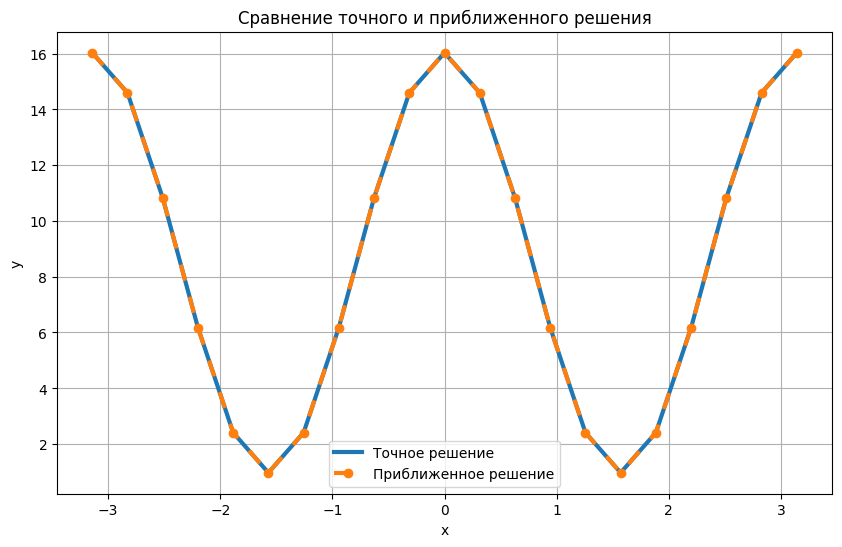

In [93]:


plt.figure(figsize=(10, 6))
plt.plot(x_values, exact, label='Точное решение', linewidth=3)
plt.plot(x_values, y_approx, 'o-', label='Приближенное решение', linestyle='dashed', dashes=(4,4), linewidth=3)
plt.title('Сравнение точного и приближенного решения')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()